# TP11 - Markov Chain Monte-Carlo
Eliott Van Dieren - epfl

In [22]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import math

In [23]:
def H(S_big,J,B,m):
    # S_big is a (m+1)x(m+1) matrix with S_{-1,.} = S_{.,-1} = 0
    H = 0
    for i in range(1,m): # loop entre i_tilde = 0 to i_tilde = m
        for j in range(1,m):
            H += 0.5*J*S_big[i,j]*(S_big[i-1,j]+S_big[i+1,j]+S_big[i,j-1]+S_big[i,j+1]) + B*S_big[i,j]
    return -H
def M(S,m):
    # S is a mxm matrix
    return np.sum(S)/(m*m)

def M_H_alg(n,m,beta,J,B,S_init):
    X_n = np.zeros(n)
    M_n = np.zeros(n)
    S_running = S_init
    X_n[0] = H(np.r_[[np.zeros(m+1)],np.c_[np.zeros(m),S_running]],J,B,m)
    M_n[0] = M(S_running,m)
    f_S_running = np.exp(-X_n[0]*beta)
    for i in range(1,n):
        flip_index = np.random.randint(m-1,size=2)
        S_new = S_running
        S_new[flip_index[0],flip_index[1]] *= -1 # flipping the spin
        S_big = np.r_[[np.zeros(m+1)],np.c_[np.zeros(m),S_new]]
        H_new = H(S_big,J,B,m)
        f_S_new = np.exp(-H_new*beta)
        alpha = min(f_S_new/f_S_running,1)
        if st.bernoulli(alpha).rvs():
            X_n[i] = H_new
            S_running = S_new
            f_S_running = f_S_new
            M_n[i] = M(S_new,m)
        else:
            X_n[i] = X_n[i-1]
            M_n[i] = M(S_running,m)
    return [X_n,np.mean(M_n),S_new]

In [29]:
m=50
n= 10000
J = 1
beta= 1/3
B = 2
S = np.random.choice([-1,1], size=m*m).reshape(m,m)
S[:,m-1] = np.zeros(m)
S[m-1,:] = np.zeros(m)
[X_n,M_bar,S_final] = M_H_alg(n,m,beta,J,B,S)
print(M_bar)

0.007095199999999999


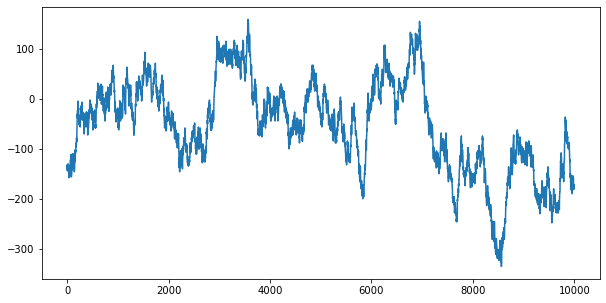

In [30]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(n),X_n)
plt.show()